# Heart Attack Risk Prediction

# Dataset Glossary (Column-wise)
* Patient ID - Unique identifier for each patient
* Age - Age of the patient
* Sex - Gender of the patient (Male/Female)
* Cholesterol - Cholesterol levels of the patient
* Blood Pressure - Blood pressure of the patient (systolic/diastolic)
* Heart Rate - Heart rate of the patient
* Diabetes - Whether the patient has diabetes (Yes/No)
* Family History - Family history of heart-related problems (1: Yes, 0: No)
* Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)
* Obesity - Obesity status of the patient (1: Obese, 0: Not obese)
* Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
* Exercise Hours Per Week - Number of exercise hours per week
* Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)
* Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)
* Medication Use - Medication usage by the patient (1: Yes, 0: No)
* Stress Level - Stress level reported by the patient (1-10)
* Sedentary Hours Per Day - Hours of sedentary activity per day
* Income - Income level of the patient
* BMI - Body Mass Index (BMI) of the patient
* Triglycerides - Triglyceride levels of the patient
* Physical Activity Days Per Week - Days of physical activity per week
* Sleep Hours Per Day - Hours of sleep per day
* Country - Country of the patient
* Continent - Continent where the patient resides
* Hemisphere - Hemisphere where the patient resides
* Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)




In [1]:
!pip install dice-ml

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("/content/heart_attack_prediction_dataset.csv")
# Remove the first column
dataset = dataset.drop(columns=["Patient ID"])
dataset = dataset.drop(columns=["Diet"])
dataset = dataset.drop(columns=["Country"])
dataset = dataset.drop(columns=["Continent"])
dataset = dataset.drop(columns=["Hemisphere"])
dataset = pd.get_dummies(dataset, columns=['Sex'])
dataset.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male
0,67,208,158/88,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,1,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,0,1


In [4]:
# Split the 'Blood Pressure' column into two separate columns: 'Systolic_BP' and 'Diastolic_BP'
dataset[['Systolic_BP', 'Diastolic_BP']] = dataset['Blood Pressure'].str.split('/', expand=True).astype(int)
dataset[['Systolic_BP', 'Diastolic_BP']] = dataset['Blood Pressure'].str.split('/', expand=True).astype(int)
dataset = dataset.drop(columns=["Blood Pressure"])

In [5]:
dataset.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Sex_Female,Sex_Male,Systolic_BP,Diastolic_BP
0,67,208,72,0,0,1,0,0,4.168189,0,...,261404,31.251233,286,0,6,0,0,1,158,88
1,21,389,98,1,1,1,1,1,1.813242,1,...,285768,27.194973,235,1,7,0,0,1,165,93
2,21,324,72,1,0,0,0,0,2.078353,1,...,235282,28.176571,587,4,4,0,1,0,174,99
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,0,0,1,163,100
4,66,318,93,1,1,1,1,0,5.804299,1,...,160555,21.809144,231,1,5,0,0,1,91,88


apply pearson coefficient

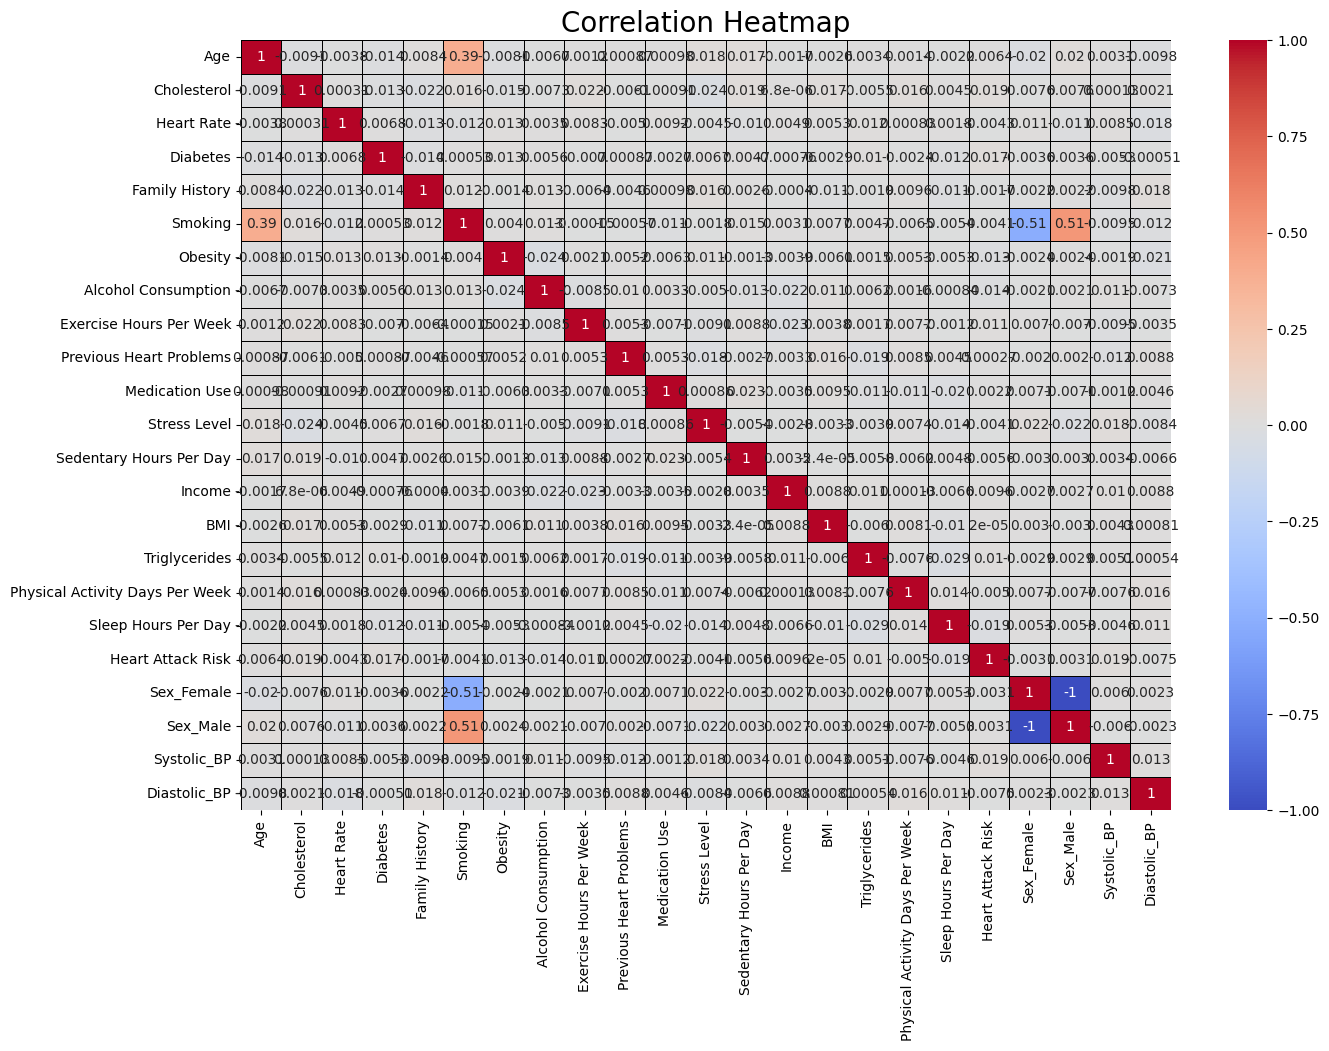

In [6]:
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Set the title
plt.title("Correlation Heatmap", fontsize=20)

plt.show()

Dataset Preprocessing

In [7]:
# Check for missing values in each column
missing_values = dataset.isnull().sum()

missing_values

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Sex_Female                         0
Sex_Male                           0
Systolic_BP                        0
Diastolic_BP                       0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
# Separate features and target variable
X = dataset.drop("Heart Attack Risk", axis=1)
y = dataset["Heart Attack Risk"]
y_one = pd.get_dummies(y)
print(y_one)

      0  1
0     1  0
1     1  0
2     1  0
3     1  0
4     1  0
...  .. ..
8758  1  0
8759  1  0
8760  0  1
8761  1  0
8762  0  1

[8763 rows x 2 columns]


In [10]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to our data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the resampled data
y_resampled_value_counts = y_resampled.value_counts(normalize=True)

y_resampled_value_counts

0    0.5
1    0.5
Name: Heart Attack Risk, dtype: float64

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8998, 22), (8998,), (2250, 22), (2250,))

Use machine leaarning models
* Random Forest

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [14]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train the models and evaluate on the test set
model_accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

model_accuracies

{'Logistic Regression': 0.49955555555555553,
 'Random Forest': 0.6751111111111111,
 'Gradient Boosting': 0.6644444444444444,
 'SVM': 0.492}

In [15]:
clf_rf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                              bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf_rf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf_rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.668

# Counterfactual

In [16]:
# %% Create diverse counterfactual explanations

import dice_ml
# Dataset
data_dice = dice_ml.Data(dataframe=dataset,
                         # For perturbation strategy
                         continuous_features=['Age',
                                              'Cholesterol',
                                              'Heart Rate',
                                              'Exercise Hours Per Week',
                                              'Sedentary Hours Per Day',
                                              'Income','BMI','Triglycerides','Systolic_BP','Diastolic_BP'],
                         outcome_name='Heart Attack Risk')
# Model
rf_dice = dice_ml.Model(model=clf_rf,
                        # There exist backends for tf, torch, ...
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice, #deatail about dataset,
                         rf_dice, # deatails about models,
                         # Random sampling, genetic algorithm, kd-tree,...
                         method="random")

# %% Create explanation
# Generate CF based on the blackbox model
input_datapoint = X_test[0:1]

cf = explainer.generate_counterfactuals(input_datapoint,
                                  total_CFs=3,
                                  desired_class="opposite")
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

/usr/local/lib/python3.10/dist-packages/dice_ml/utils/exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "
100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

Query instance (original outcome : 0)


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male,Systolic_BP,Diastolic_BP,Heart Attack Risk
0,35,290,41,1,0,1,1,0,9.184642,1,...,141121,18.714264,411,2,4,0,1,140,107,0



Diverse Counterfactual set (new outcome: 1.0)


,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male,Systolic_BP,Diastolic_BP,Heart Attack Risk
0,-,-,-,1.0,0.0,0,1.0,0.0,9.18464137048322,1.0,...,-,29.665685,-,2.0,4.0,0.0,1.0,-,-,1
1,-,-,63.0,1.0,0.0,0,1.0,0.0,9.18464137048322,1.0,...,-,18.714263145758498,-,2.0,4.0,0.0,1.0,-,-,1
2,-,270.0,-,1.0,0.0,1.0,1.0,0.0,9.18464137048322,1.0,...,-,18.714263145758498,-,2.0,4.0,0.0,0,-,-,1


Deep Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the DNN architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(1, activation='sigmoid')  # Binary classification
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

test_accuracy

Epoch 1/500
225/225 - 4s - loss: 0.5794 - accuracy: 0.6792 - val_loss: 0.5910 - val_accuracy: 0.6656 - 4s/epoch - 20ms/step
Epoch 2/500
225/225 - 1s - loss: 0.5795 - accuracy: 0.6894 - val_loss: 0.5918 - val_accuracy: 0.6611 - 1s/epoch - 7ms/step
Epoch 3/500
225/225 - 1s - loss: 0.5833 - accuracy: 0.6781 - val_loss: 0.5912 - val_accuracy: 0.6589 - 1s/epoch - 5ms/step
Epoch 4/500
225/225 - 1s - loss: 0.5777 - accuracy: 0.6827 - val_loss: 0.5926 - val_accuracy: 0.6611 - 1s/epoch - 5ms/step
Epoch 5/500
225/225 - 1s - loss: 0.5780 - accuracy: 0.6849 - val_loss: 0.5920 - val_accuracy: 0.6644 - 1s/epoch - 5ms/step
Epoch 6/500
225/225 - 1s - loss: 0.5701 - accuracy: 0.6945 - val_loss: 0.5995 - val_accuracy: 0.6544 - 1s/epoch - 5ms/step
Epoch 7/500
225/225 - 1s - loss: 0.5719 - accuracy: 0.6877 - val_loss: 0.5934 - val_accuracy: 0.6628 - 1s/epoch - 5ms/step
Epoch 8/500
225/225 - 1s - loss: 0.5696 - accuracy: 0.6837 - val_loss: 0.5966 - val_accuracy: 0.6539 - 996ms/epoch - 4ms/step
Epoch 9/500


KeyboardInterrupt: ignored